# Clean data

In [1]:
import pandas as pd

classification1 = pd.read_excel(
    "../data/train_Ametist/classification.xlsx",
    sheet_name="Материалы, изд, констр и оборуд",
)
classification2 = pd.read_excel(
    "../data/train_Ametist/classification.xlsx", sheet_name="Машины и механизмы"
)
classification = pd.concat([classification1, classification2], axis=0)
train_data = pd.read_excel("../data/train_Ametist/train.xlsx")

## Classification data

In [2]:
clear_mask = classification.dropna(axis=0, how='any').iloc[:, 0].apply(lambda x: all(c in '0123456789.- ' for c in x))
cleared_classification = classification.dropna(axis=0, how='any')[clear_mask].rename(columns={'Классификатор строительных ресурсов': 'code', 'Unnamed: 1': 'name', 'Unnamed: 2': 'measure'})
cleared_classification = cleared_classification.reset_index(drop=True)d
print(classification.shape[0], cleared_classification.shape[0])
cleared_classification.head()

216113 213083


,code,name,measure
0,01.1.01.01-0002,Детали фасонные коньковые к листам хризотилцем...,100 компл
1,23.65.12.190.01.1.01.01-0002-000,Детали фасонные коньковые к листам хризотилцем...,100 компл
2,01.1.01.02-0011,"Доска электротехническая дугостойкая (АЦЭИД), ...",т
3,23.65.12.190.01.1.01.02-0011-000,"Доска электротехническая дугостойкая (АЦЭИД), ...",т
4,01.1.01.04-1018,"Листы хризотилцементные волнистые, профиль 40/...",м2


## Train data

In [3]:
train_data.head()

,record_name,record_name_2,ref_code,ref_name,ref_unit
0,DIN -рейка оцинкованная ТН35-7.5 100 см (Chint),"DIN-рейка 35х7,5 мм длиной 1000 мм",27.33.13.130.20.2.08.01-0001-000,"DIN-рейки металлические, оцинкованные, размеры...",100 шт
1,Анкерный элемент ТехноНиколь 8*45мм,Анкерный элемент TN 8x4.5,25.94.11.190.01.7.15.01-1169-000,"Анкер грунтовый забивной самораскрывающийся, о...",шт
2,Анкер забивной М10 DRM 12x40 сталь,Анкер втулочный M10,25.94.11.190.01.7.15.01-0037-000,"Анкер забивной латунный, диаметр внутренней ре...",шт
3,Анкер забивной М10/12x40,Анкер втулочный M10,25.94.11.190.01.7.15.01-0037-000,"Анкер забивной латунный, диаметр внутренней ре...",шт
4,Анкер забивной М8 LAZ латунь,Анкер втулочный M8,25.94.11.190.01.7.15.01-0036-000,"Анкер забивной латунный, диаметр внутренней ре...",шт


# SentenceTokenizer model

In [4]:
from sentence_transformers import SentenceTransformer, util

model = SentenceTransformer("DiTy/bi-encoder-russian-msmarco")
model

/home/peter/anaconda3/envs/ametist/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/home/peter/anaconda3/envs/ametist/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


SentenceTransformer(
  (0): Transformer({'max_seq_length': 512, 'do_lower_case': False}) with Transformer model: BertModel 
  (1): Pooling({'word_embedding_dimension': 768, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False, 'pooling_mode_weightedmean_tokens': False, 'pooling_mode_lasttoken': False, 'include_prompt': True})
)

In [5]:
for i in range(20):
    print(
        "|".join(model.tokenizer.tokenize(cleared_classification.name.sample().item()))
    )
    print("-" * 10)

Мач|##та|сек|##ционно|-|поворот|##ная|для|установки|2|-|х|антенн|,|высота|5|м
----------
Дол|##ото|трех|##шар|##оше|##чное|III|349|,|2|Т|-|Ц|##В
----------
Мат|##ы|прош|##ивные|теплоизоля|##ционные|из|минеральной|ват|##ы|,|без|об|##клад|##ок|,|марка|100|,|толщина|80|мм
----------
Хомут|чугун|##ный|сед|##елка|для|бесс|##вар|##ного|соединения|под|муфт|##у|,|диаметр|200|##х|##80|мм
----------
Кран|шаров|##ой|цельно|##св|##арной|10|##с|##71|##фт|полно|##проход|##ной|из|кован|##ной|стали|под|прив|##арку|,|без|опоры|скольжения|,|для|надзем|##ной|установки|,|управление|ручкой|,|номинально|##е|давление|4|,|0|МПа|(|40|кгс|/|см|##2|)|,|номинал|##ь|##ный|диаметр|150|мм
----------
Каб|##ель|силовой|с|алюминиев|##ыми|жила|##ми|АВ|##ВГ|##нг|-|LS|4х|##16|-|660
----------
Короб|кабель|##ный|одно|##ярус|##ный|,|окрашен|##ный|,|сейсм|##остой|##кий|,|угловой|,|на|четыре|направления|под|углом|90|град|.|,|толщина|металла|1|,|5|мм|,|2|-|3|класс|безопасности|,|габар|##итный|размер|100|##x|##300|##x|##51|##2|

## Compare similar (but not equal names)

In [6]:
for e in cleared_classification.name.iloc[:40:2]:
    print(e)

Детали фасонные коньковые к листам хризотилцементным волнистым
Доска электротехническая дугостойкая (АЦЭИД), толщина 6 мм
Листы хризотилцементные волнистые, профиль 40/150, 7-волновые, толщина 5,2 мм
Листы хризотилцементные волнистые, профиль 40/150, 8-волновые, толщина 5,2 мм
Листы хризотилцементные волнистые, профиль 40/150, 8-волновые, окрашенные, толщина 5,2 мм
Листы хризотилцементные волнистые, профиль 40/150, 8-волновые, окрашенные, толщина 5,8 мм
Листы хризотилцементные волнистые, профиль 51/177, толщина 5,2 мм
Листы хризотилцементные волнистые, профиль 51/177, 6 волновые, толщина 5,2 мм
Листы хризотилцементные волнистые, профиль 51/177, толщина 6 мм
Листы хризотилцементные волнистые, профиль 51/177, 6 волновые, толщина 6 мм
Листы хризотилцементные волнистые, профиль 40/150, толщина 5,8 мм
Листы хризотилцементные плоские непрессованные, толщина 6 мм
Листы хризотилцементные плоские непрессованные, толщина 8 мм
Листы хризотилцементные плоские непрессованные, толщина 10 мм
Листы хр

In [7]:
sentences = cleared_classification.name.iloc[:40:2].to_list()

embeddings = model.encode(sentences)

target_idx = 2

ss = util.semantic_search(embeddings[target_idx], embeddings)[0]

print(f"target: {sentences[target_idx]}\n")

for e in ss:
    if e["corpus_id"] == 2:
        continue
    print(f'{sentences[e["corpus_id"]]} - {e["score"]}')

target: Листы хризотилцементные волнистые, профиль 40/150, 7-волновые, толщина 5,2 мм

Листы хризотилцементные волнистые, профиль 40/150, 8-волновые, толщина 5,2 мм - 0.9994583129882812
Листы хризотилцементные волнистые, профиль 40/150, 8-волновые, окрашенные, толщина 5,8 мм - 0.9136314392089844
Листы хризотилцементные волнистые, профиль 40/150, 8-волновые, окрашенные, толщина 5,2 мм - 0.9128578901290894
Листы хризотилцементные волнистые, профиль 51/177, 6 волновые, толщина 6 мм - 0.8978011608123779
Листы хризотилцементные волнистые, профиль 51/177, 6 волновые, толщина 5,2 мм - 0.8914273977279663
Листы хризотилцементные волнистые, профиль 40/150, толщина 5,8 мм - 0.7841696739196777
Листы хризотилцементные волнистые, профиль 51/177, толщина 5,2 мм - 0.7454618811607361
Листы хризотилцементные волнистые, профиль 51/177, толщина 6 мм - 0.7051211595535278
Листы хризотилцементные плоские прессованные, толщина 12 мм - 0.6052501201629639


<Axes: >

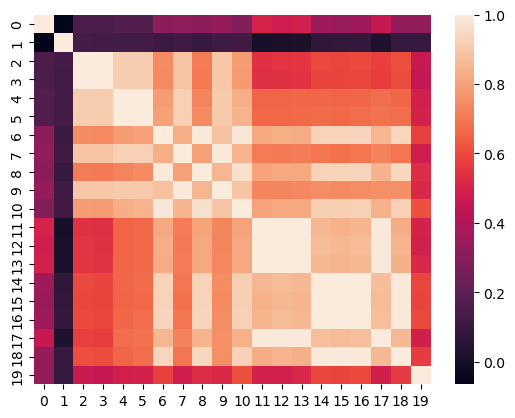

In [8]:
import torch
import torch.nn.functional as F
import numpy as np
import seaborn as sns


def pairwise_similarity(embs):
    sim_matrix = np.zeros((embs.shape[0], embs.shape[0]))

    for i in range(embs.shape[0]):
        for j in range(embs.shape[0]):
            sim_matrix[i, j] = F.cosine_similarity(
                torch.from_numpy(embs[i]), torch.from_numpy(embs[j]), dim=0
            )
    return sim_matrix


# 1й и 2й эелементы лежат в других группах, 3й-18й в одной

sim_matrix = pairwise_similarity(embeddings)
sns.heatmap(sim_matrix)

## Compare wrongful terminations from train with rightful ones

In [9]:
train_data.head()

,record_name,record_name_2,ref_code,ref_name,ref_unit
0,DIN -рейка оцинкованная ТН35-7.5 100 см (Chint),"DIN-рейка 35х7,5 мм длиной 1000 мм",27.33.13.130.20.2.08.01-0001-000,"DIN-рейки металлические, оцинкованные, размеры...",100 шт
1,Анкерный элемент ТехноНиколь 8*45мм,Анкерный элемент TN 8x4.5,25.94.11.190.01.7.15.01-1169-000,"Анкер грунтовый забивной самораскрывающийся, о...",шт
2,Анкер забивной М10 DRM 12x40 сталь,Анкер втулочный M10,25.94.11.190.01.7.15.01-0037-000,"Анкер забивной латунный, диаметр внутренней ре...",шт
3,Анкер забивной М10/12x40,Анкер втулочный M10,25.94.11.190.01.7.15.01-0037-000,"Анкер забивной латунный, диаметр внутренней ре...",шт
4,Анкер забивной М8 LAZ латунь,Анкер втулочный M8,25.94.11.190.01.7.15.01-0036-000,"Анкер забивной латунный, диаметр внутренней ре...",шт


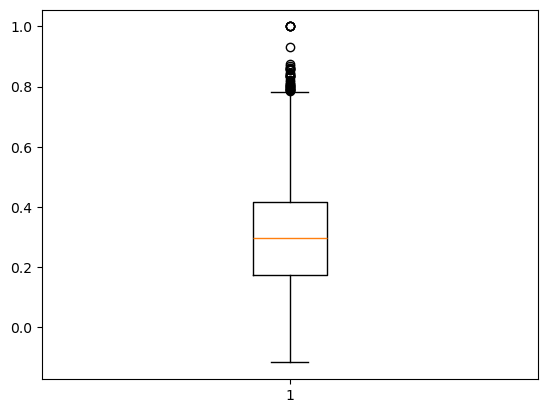

In [10]:
import matplotlib.pyplot as plt


ref_embeddings = model.encode(train_data.ref_name.to_list(), convert_to_tensor=True)
wrong_embeddings1 = model.encode(
    train_data.record_name.to_list(), convert_to_tensor=True
)
wrong_embeddings2 = model.encode(
    train_data.record_name_2.to_list(), convert_to_tensor=True
)

distances = torch.zeros((ref_embeddings.shape[0] * 2,))
distances[: ref_embeddings.shape[0]] = F.cosine_similarity(
    ref_embeddings, wrong_embeddings1, dim=1
)
distances[ref_embeddings.shape[0] :] = F.cosine_similarity(
    ref_embeddings, wrong_embeddings2, dim=1
)

plt.boxplot(distances)

In [11]:
classification_embeddings = model.encode(
    cleared_classification.name.to_list(), convert_to_tensor=True
)

In [12]:
from tqdm.notebook import trange

correct_matches = 0

for i in trange(wrong_embeddings1.shape[0]):
    ref_emb_distance = F.cosine_similarity(
        ref_embeddings[i], wrong_embeddings1[i], dim=0
    ).item()
    classification_emb_distances = F.cosine_similarity(
        classification_embeddings, wrong_embeddings1[i].unsqueeze(0), dim=1
    )

    if (
        train_data.ref_name.iloc[i]
        == cleared_classification.name[
            torch.argmax(classification_emb_distances).cpu().item()
        ]
    ):
        correct_matches += 1


for i in trange(wrong_embeddings2.shape[0]):
    ref_emb_distance = F.cosine_similarity(
        ref_embeddings[i], wrong_embeddings2[i], dim=0
    ).item()
    classification_emb_distances = F.cosine_similarity(
        classification_embeddings, wrong_embeddings2[i].unsqueeze(0), dim=1
    )

    if (
        train_data.ref_name.iloc[i]
        == cleared_classification.name[
            torch.argmax(classification_emb_distances).cpu().item()
        ]
    ):
        correct_matches += 1
    # print(f'input : {train_data.record_name[i]}')
    # print(f'ref: {train_data.ref_name[i]}')
    # print(f'closest_classificator: {cleared_classification.name[torch.argmax(classification_emb_distances).cpu().item()]}')
    # print(round(ref_emb_distance, 2), round(classification_emb_distances.mean().item(), 2), round(classification_emb_distances.max().item(), 2))
    # print()

  0%|          | 0/2407 [00:00<?, ?it/s]

  0%|          | 0/2407 [00:00<?, ?it/s]

In [16]:
correct_matches / (wrong_embeddings2.shape[0] * 2)

0.01038637307852098